# 1. Random Walks

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하여라. (몬테카를로 시뮬레이션)

D:\physics\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


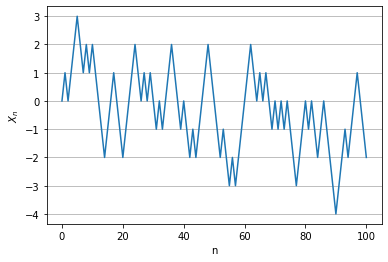

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def random_walk_1D(n):
    elements = [1, -1]
    probabilities = [0.5, 0.5]
    x = [0]
    
    for i in range(1, n + 1):
        y = np.random.choice(elements, 1, p = probabilities)
        x.append(x[i-1] + y)    
    return x


n = 100
N = [i for i in range(n+1)]

plt.plot(N, random_walk_1D(n))
plt.grid(axis = 'y')
plt.xlabel('n')
plt.ylabel('$X_n$')
plt.show()

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [119]:
def mean(n):
    np.mean(random_walk_1D(n))
    
    return np.mean(random_walk_1D(n))

mean(n)

array([5])

In [120]:
def var(n):
    np.var(random_walk_1D(n))
    
    return np.var(random_walk_1D(n))

var(n)

array([15.25909225])

In [121]:
def std(n):
    np.std(random_walk_1D(n))
    
    return np.std(random_walk_1D(n))

std(n)

array([3.96492316])

D:\physics\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


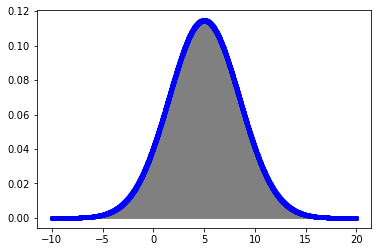

In [131]:
from scipy.stats import norm 
import matplotlib.pyplot as plt
import numpy as np
rv = norm(loc = mean(n), scale = std(n))
x = np.arange(-10,20,0.01)
y = rv.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'bo',ms=4,label= 'normal pdf')
ax.vlines(x,0,y,colors='gray',lw=5, alpha=0.5)


# 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)
1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [112]:
import numpy as np
import sympy
from sympy import Symbol

In [113]:
t = sympy.symbols('t')
r = sympy.symbols('r')
x = sympy.Function('x')
x(t)

x(t)

In [114]:
sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2))

Eq(Derivative(x(t), t), r*x(t) - x(t)**2)

1. r=-1, x(0)=2

In [115]:
r=-1
sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})

Eq(x(t), -2/(3*(2/3 - exp(t))))

2. r=-1, x(0)=-2

In [116]:
r=-1
sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})

Eq(x(t), -2/(2 - exp(t)))

3. r=1, x(0)=2

In [117]:
r=1
sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})

Eq(x(t), 1/(1 - exp(-t)/2))

4. r=1, x(0)=-2

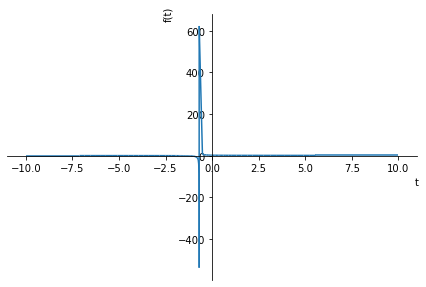

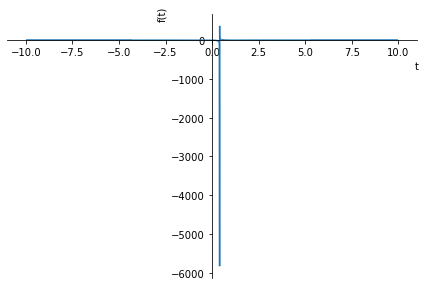

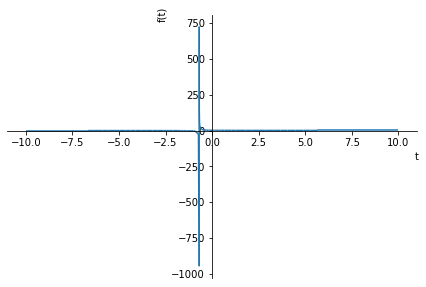

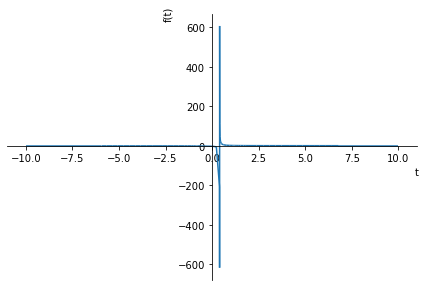

In [119]:
%matplotlib inline

solve1 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})
sympy.plot(solve1.rhs)


solve2 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})
sympy.plot(solve2.rhs)

solve3 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})
sympy.plot(solve3.rhs)

solve4 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})
sympy.plot(solve4.rhs)

In [118]:
r=1
sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})

Eq(x(t), 1/(1 - 3*exp(-t)/2))

(b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2. $$

1. r=-1
2. r=1

In [127]:
import numpy as np
import sympy
from sympy import Symbol

In [129]:
x,t = sympy.symbols("x,t")

1. r=-1

In [131]:
r=-1
sympy.solve(r*x-(x**2))

[-1, 0]

2. r=1

In [132]:
r=1
sympy.solve(r*x-(x**2))

[0, 1]